# a questo punto ho il dataset pronto per effettuarci un'analisi e feature engineering oltre che la data visualizzation

In [55]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from pandas.api.types import CategoricalDtype
from scipy.stats import chi2_contingency
import seaborn as sns



df = pd.read_csv('cleaned_data.csv')
df.head()
df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 321457 entries, 0 to 321456
Data columns (total 59 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   _STATE      321457 non-null  float64
 1   GENHLTH     320707 non-null  float64
 2   PHYSHLTH    315181 non-null  float64
 3   MENTHLTH    316891 non-null  float64
 4   HLTHPLN1    320798 non-null  float64
 5   PERSDOC2    320512 non-null  float64
 6   MEDCOST     320812 non-null  float64
 7   CHECKUP1    318370 non-null  float64
 8   BPHIGH4     320806 non-null  float64
 9   BLOODCHO    321457 non-null  int64  
 10  CHOLCHK     317268 non-null  float64
 11  TOLDHI2     318789 non-null  float64
 12  CVDINFR4    320086 non-null  float64
 13  CVDCRHD4    318652 non-null  float64
 14  CVDSTRK3    320613 non-null  float64
 15  ASTHMA3     320590 non-null  float64
 16  CHCSCNCR    320631 non-null  float64
 17  CHCOCNCR    320822 non-null  float64
 18  CHCCOPD1    319944 non-null  float64
 19  HA

In [56]:
df['EDUCA'].unique()
print(df['EDUCA'].value_counts().sort_index())
print(df['INCOME2'].value_counts().sort_index())
print(df['_SMOKER3'].value_counts().sort_index())


EDUCA
1.0       284
2.0      6755
3.0     14206
4.0     84408
5.0     87569
6.0    127640
Name: count, dtype: int64
INCOME2
1.0    11742
2.0    13956
3.0    18569
4.0    22889
5.0    28973
6.0    39710
7.0    45998
8.0    94510
Name: count, dtype: int64
_SMOKER3
1.0     30076
2.0     12404
3.0     99024
4.0    177792
Name: count, dtype: int64


In [ ]:

binary_cols = ['HLTHPLN1','MEDCOST','BLOODCHO','TOLDHI2','CVDINFR4',
               'CVDCRHD4','CVDSTRK3','ASTHMA3','CHCSCNCR','CHCOCNCR',
               'CHCCOPD1','HAVARTH3','ADDEPEV2','CHCKIDNY','VETERAN3',
               'INTERNET','QLACTLM2','USEEQUIP','BLIND','DECIDE',
               'DIFFWALK','DIFFDRES','DIFFALON','SMOKE100','EXERANY2','FLUSHOT6',
               'PNEUVAC3', 'HIVTST6', 'PERSDOC2', 'BPHIGH4'] 
nominal_cols = [
    '_STATE','SEX','MARITAL','EMPLOY1','_RACE', '_BMI5CAT'
]

numeric_cols = [
    'PHYSHLTH','MENTHLTH','CHILDREN','NUMADULT_2',
    'ALCDAY5', 'FRUITJU1','FRUIT1', 'FVBEANS','FVGREEN',
    'FVORANG','VEGETAB1',  'STRENGTH'
]

# Inverto le ordinali decrescenti
df['EDUCA'] = df['EDUCA'].map({1: 6, 2: 5, 3: 4, 4: 3, 5: 2, 6: 1})
df['INCOME2'] = df['INCOME2'].map({1: 8, 2: 7, 3: 6, 4: 5, 5: 4, 6: 3, 7: 2, 8: 1})
df['_SMOKER3'] = df['_SMOKER3'].map({1: 4, 2: 3, 3: 2, 4: 1})
df['USENOW3'] = df['USENOW3'].map({1: 3, 2: 2, 3: 1})


ordinal = {
    'GENHLTH':       [1,2,3,4,5],       # 1=Excellent … 5=Poor
    'CHECKUP1':      [1,2,3,4,5,6,7,8], # 
    'CHOLCHK':       [1,2,3,4],         
    '_AGE_G':        [1,2,3,4,5,6],     # 1=18–24 … 6=65+
    '_PACAT1':       [1,2,3,4],         # 1=High active … 4=Inactive
    'SEATBELT':      [1,2,3,4,5],        # 1=Always … 5=Never (invertito)
    'EDUCA':         [1,2,3,4,5,6],     # 1=None … 6=Post-grad
    'INCOME2':       [1,2,3,4,5,6,7,8], # 1=Less than $10K … 8=$75K or more
    'USENOW3':       [1,2,3],           # 1=Every day … 3=Not at all (invertito)
    '_SMOKER3':       [1,2,3,4],         # 1=Current every day … 4=Never 
}


for col in nominal_cols:
    df[col] = df[col].astype(str)
    df[col] = df[col].replace(['nan', 'None', '-9223372036854775808'], np.nan)

# Ordinali: forzati a float con NaN se conversione fallisce
for col in list(ordinal.keys()):
    df[col] = pd.to_numeric(df[col], errors='coerce')

df[binary_cols] = df[binary_cols].astype('Int64')

df[numeric_cols] = df[numeric_cols].apply(pd.to_numeric, errors='coerce')



In [58]:
print(df['EDUCA'].value_counts().sort_index())
print(df['INCOME2'].value_counts().sort_index())
print(df['_SMOKER3'].value_counts().sort_index())

EDUCA
1.0    127640
2.0     87569
3.0     84408
4.0     14206
5.0      6755
6.0       284
Name: count, dtype: int64
INCOME2
1.0    94510
2.0    45998
3.0    39710
4.0    28973
5.0    22889
6.0    18569
7.0    13956
8.0    11742
Name: count, dtype: int64
_SMOKER3
1.0    177792
2.0     99024
3.0     12404
4.0     30076
Name: count, dtype: int64


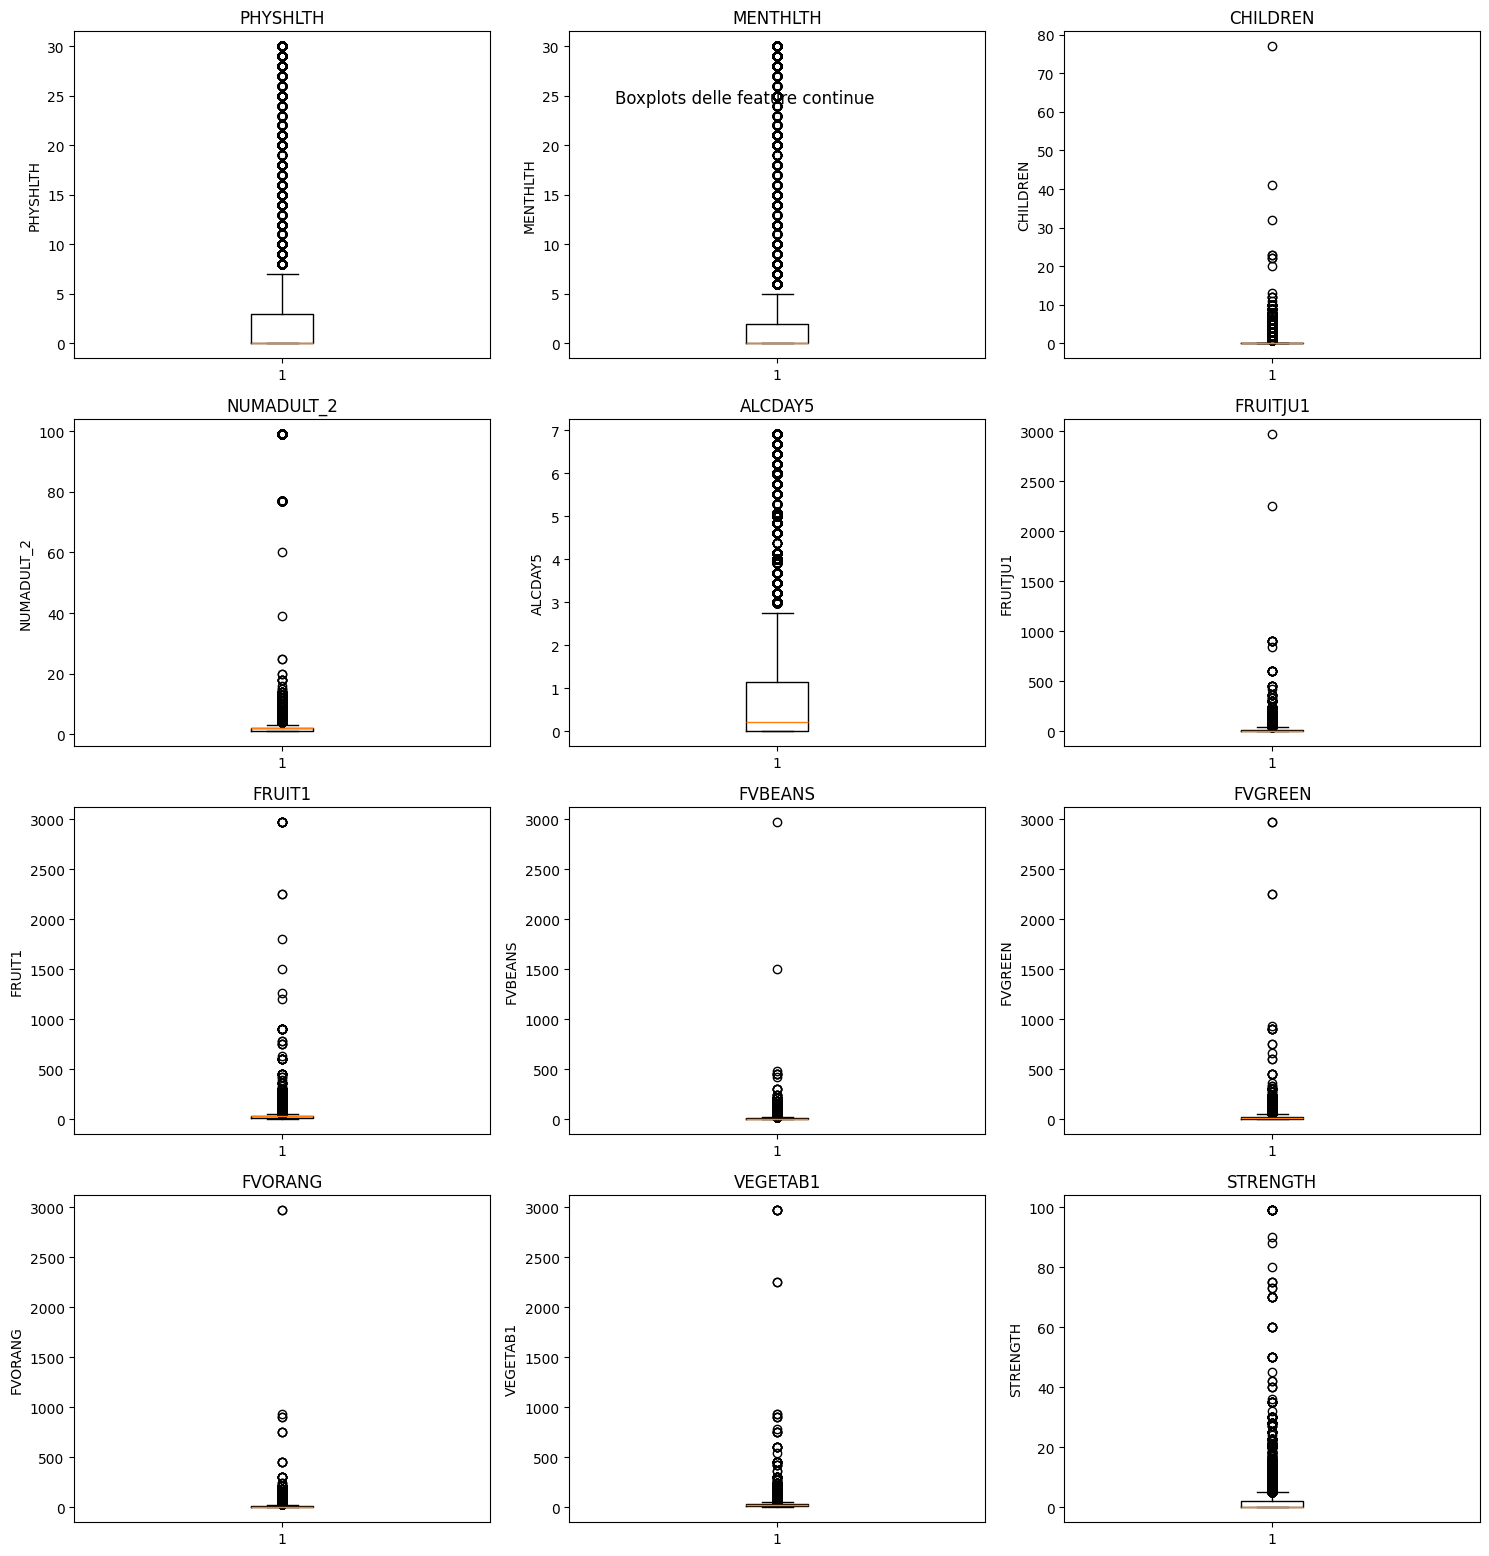

In [59]:

# Target variable
target = 'DIABETE3'

# 1) Boxplot in griglia per le feature continue
n = len(numeric_cols)
ncols = 3
nrows = int(np.ceil(n/ncols))
fig, axes = plt.subplots(nrows, ncols, figsize=(ncols*5, nrows*4))
for ax, col in zip(axes.flatten(), numeric_cols):
    ax.boxplot(df[col].dropna())
    ax.set_title(col)
    ax.set_ylabel(col)

# Disattiva i pannelli inutilizzati
for ax in axes.flatten()[n:]:
    ax.axis('off')
fig.suptitle('Boxplots delle feature continue', y=0.92)
plt.tight_layout()
plt.show()


Alcuni valori sembrano poco plausibili come ad esempio il 77 di children, probabilmente dovuto ad un errore. Applico ad alcune feature un logaritmo per poterle vedere meglio.

In [ ]:
df['CHILDREN'] = df['CHILDREN'].where(df['CHILDREN'] <= 10, np.nan)
# 2) Winsorizzazione al 1° e 99° percentile per variabili skewed
skew_vars = ['PHYSHLTH','MENTHLTH','NUMADULT_2',
    'ALCDAY5', 'FRUITJU1','FRUIT1', 'FVBEANS','FVGREEN',
    'FVORANG','VEGETAB1',  'STRENGTH']
for var in skew_vars:
    lower = df[var].quantile(0.01)
    upper = df[var].quantile(0.99)
    df[f'{var}'] = df[var].clip(lower=lower, upper=upper)


"\nfor var in skew_vars:\n    df[f'{var}'] = np.log1p(df[f'{var}'])\n    df[f'{var}'] = np.sqrt(df[f'{var}'])\n"

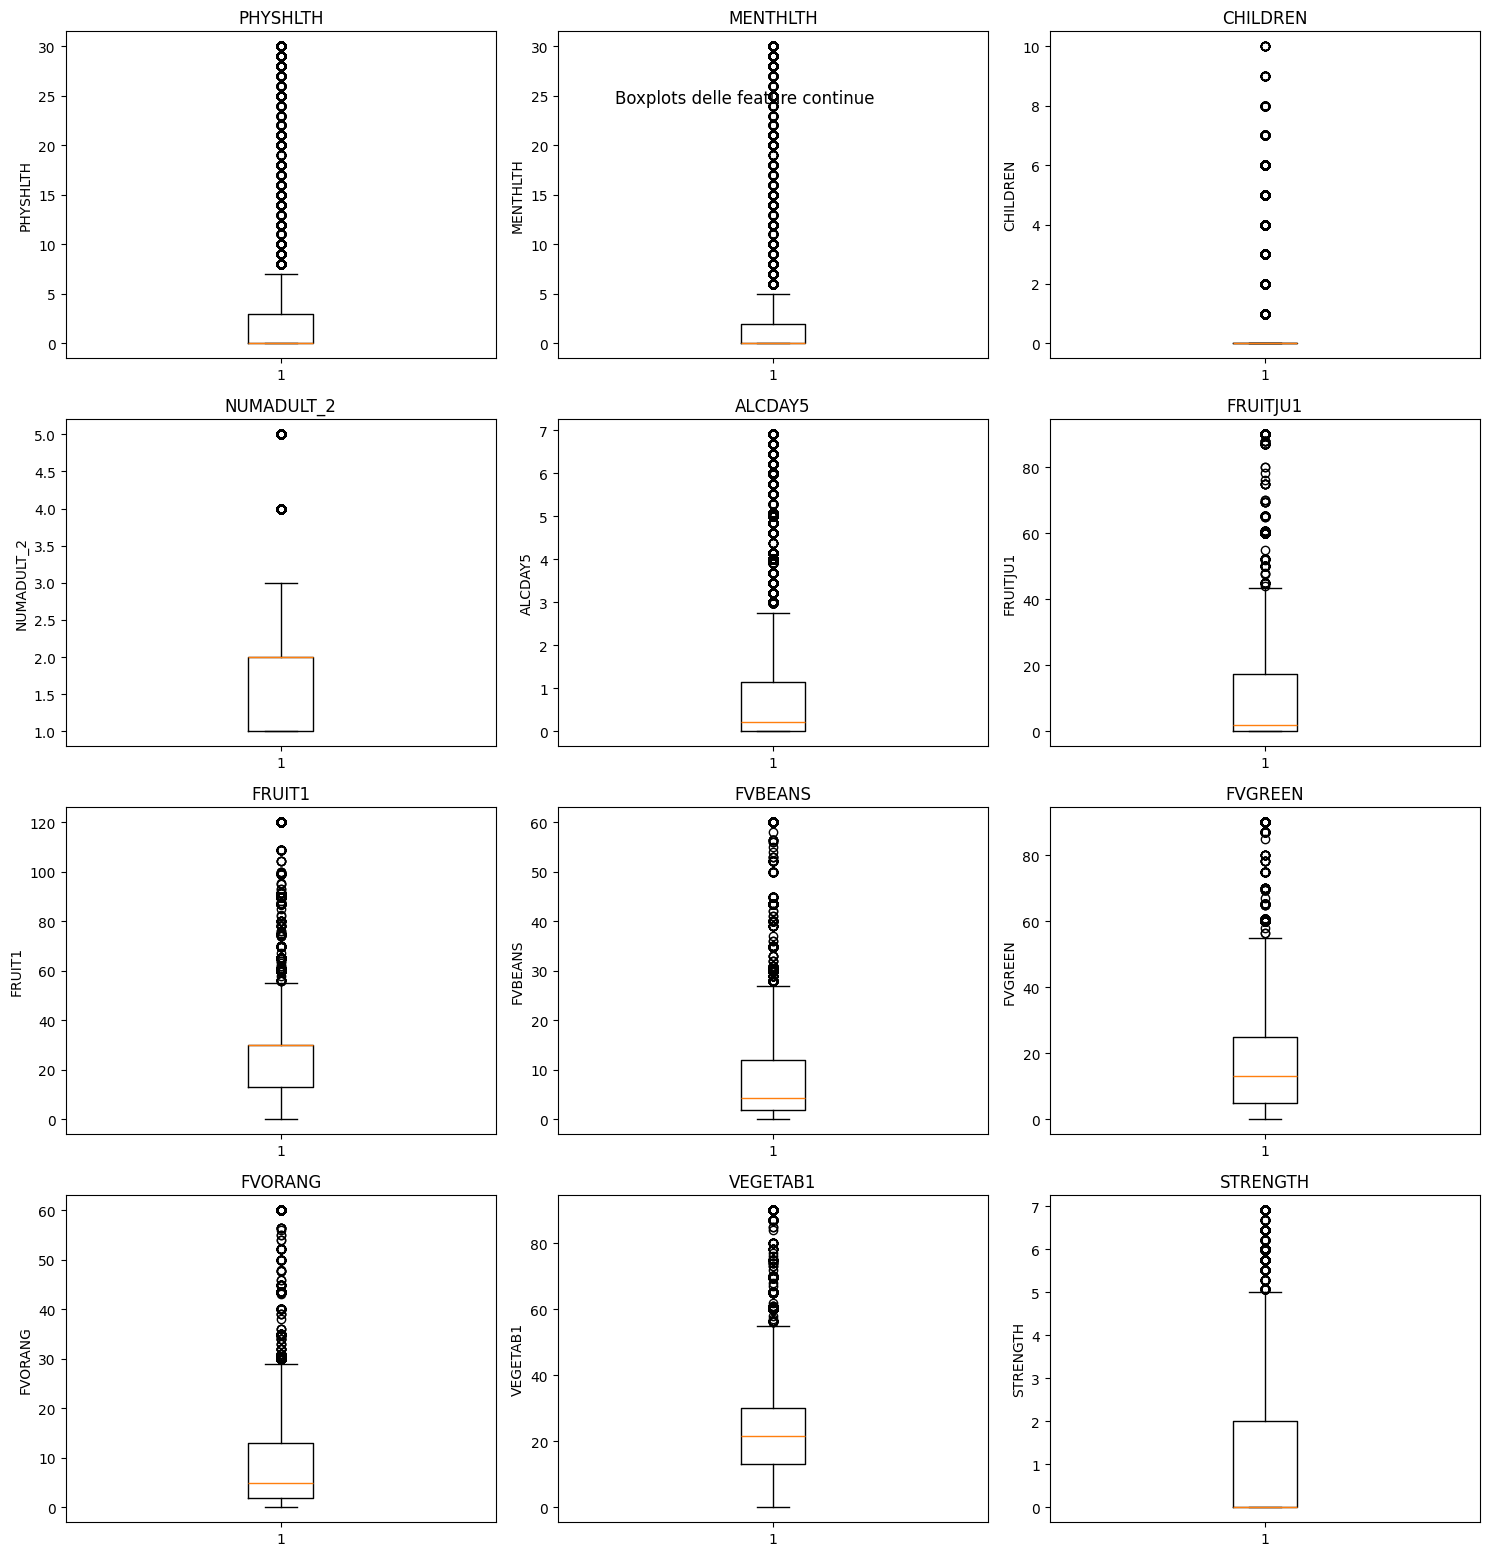

In [61]:

# 1) Boxplot in griglia per le feature continue
n = len(numeric_cols)
ncols = 3
nrows = int(np.ceil(n/ncols))
fig, axes = plt.subplots(nrows, ncols, figsize=(ncols*5, nrows*4))
for ax, col in zip(axes.flatten(), numeric_cols):
    ax.boxplot(df[col].dropna())
    ax.set_title(col)
    ax.set_ylabel(col)


for ax in axes.flatten()[n:]:
    ax.axis('off')
fig.suptitle('Boxplots delle feature continue', y=0.92)
plt.tight_layout()
plt.show()


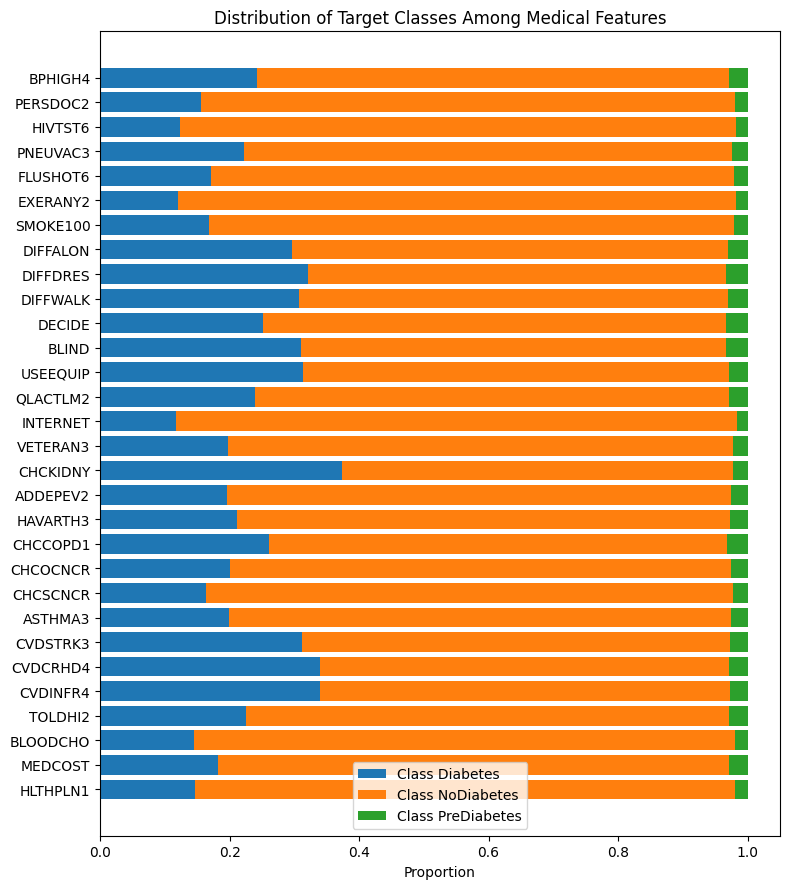

In [ ]:
classes = sorted(df[target].unique())
prop_df = pd.DataFrame(index=binary_cols, columns=classes, dtype=float)

for col in binary_cols:
    subset = df[df[col] == 1]
    p = subset[target].value_counts(normalize=True)
    for cls in classes:
        prop_df.loc[col, cls] = p.get(cls, 0)


fig, ax = plt.subplots(figsize=(8, len(binary_cols) * 0.3))
y = np.arange(len(binary_cols))
left = np.zeros(len(binary_cols))

for cls in classes:
    ax.barh(y, prop_df[cls], left=left, label=f'Class {cls}')
    left += prop_df[cls]

ax.set_yticks(y)
ax.set_yticklabels(binary_cols)
ax.set_xlabel('Proportion')
ax.set_title('Distribution of Target Classes Among Medical Features')
ax.legend(loc='best')

plt.tight_layout()
plt.show()

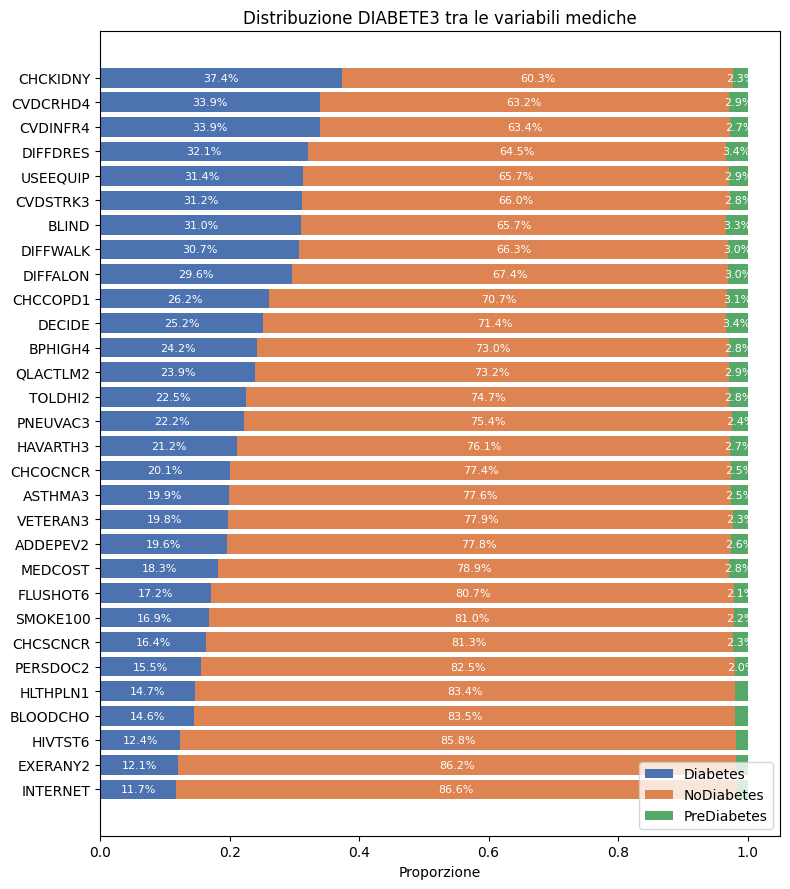

In [ ]:


prop_df = prop_df.sort_values(by='Diabetes', ascending=False)


colors = ['#4C72B0', '#DD8452', '#55A868']   # blu, arancio, verde
labels = prop_df.columns.tolist()           # ['NoDiabetes','Diabetes','PreDiabetes']

fig, ax = plt.subplots(figsize=(8, len(prop_df)*0.3))
y = np.arange(len(prop_df))
left = np.zeros(len(prop_df))

# Costruisco il barh impilato iterando sulle colonne reali
for color, cls in zip(colors, labels):
    vals = prop_df[cls].values
    ax.barh(y, vals, left=left, color=color, label=cls)
    # Annotazioni percentuali
    for idx, v in enumerate(vals):
        if v > 0.02:  # solo se >2%
            ax.text(left[idx] + v/2, idx,
                    f"{v*100:.1f}%",
                    va='center', ha='center',
                    color='white', fontsize=8)
    left += vals

# Formattazione finale
ax.set_yticks(y)
ax.set_yticklabels(prop_df.index)
ax.invert_yaxis()  # feature col più diabetici in alto
ax.set_xlabel('Proporzione')
ax.set_title('Distribuzione DIABETE3 tra le variabili mediche')
ax.legend(loc='lower right', frameon=True)
plt.tight_layout()
plt.show()


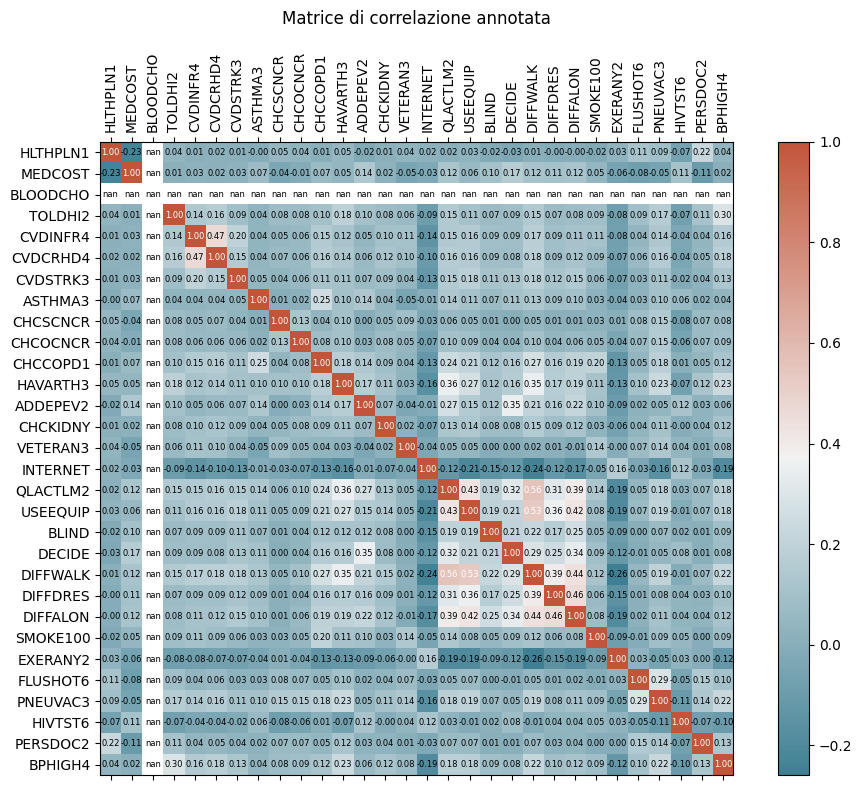

In [ ]:

corr = df[binary_cols].corr()
cmap = sns.diverging_palette(220, 20, as_cmap=True)

#   heatmap
fig, ax = plt.subplots(figsize=(10, 8))
cax = ax.matshow(corr, cmap=cmap)
fig.colorbar(cax)


ticks = np.arange(len(binary_cols))
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(binary_cols, rotation=90)
ax.set_yticklabels(binary_cols)


for i in ticks:
    for j in ticks:
        ax.text(j, i, f"{corr.iloc[i, j]:.2f}",
                ha='center', va='center', fontsize=6,
                color='white' if abs(corr.iloc[i, j]) > 0.5 else 'black')

plt.title('Matrice di correlazione annotata', pad=20)
plt.tight_layout()
plt.show()

le correlazioni sono trascurabili

In [65]:
#elimino la colonna bloodcho

df.drop(columns=['BLOODCHO'], inplace=True)


binary_cols = ['HLTHPLN1','MEDCOST','TOLDHI2','CVDINFR4',
               'CVDCRHD4','CVDSTRK3','ASTHMA3','CHCSCNCR','CHCOCNCR',
               'CHCCOPD1','HAVARTH3','ADDEPEV2','CHCKIDNY','VETERAN3',
               'INTERNET','QLACTLM2','USEEQUIP','BLIND','DECIDE',
               'DIFFWALK','DIFFDRES','DIFFALON','SMOKE100','EXERANY2','FLUSHOT6',
               'PNEUVAC3', 'HIVTST6', 'PERSDOC2', 'BPHIGH4'] 

In [66]:
y_map = {'NoDiabetes': 0, 'PreDiabetes': 1, 'Diabetes': 2}
df['DIABETE3'] = df['DIABETE3'].map(y_map).astype('Int64')

In [67]:
df['DIABETE3'].value_counts().sort_index()

DIABETE3
0    268363
1      6265
2     46829
Name: count, dtype: Int64

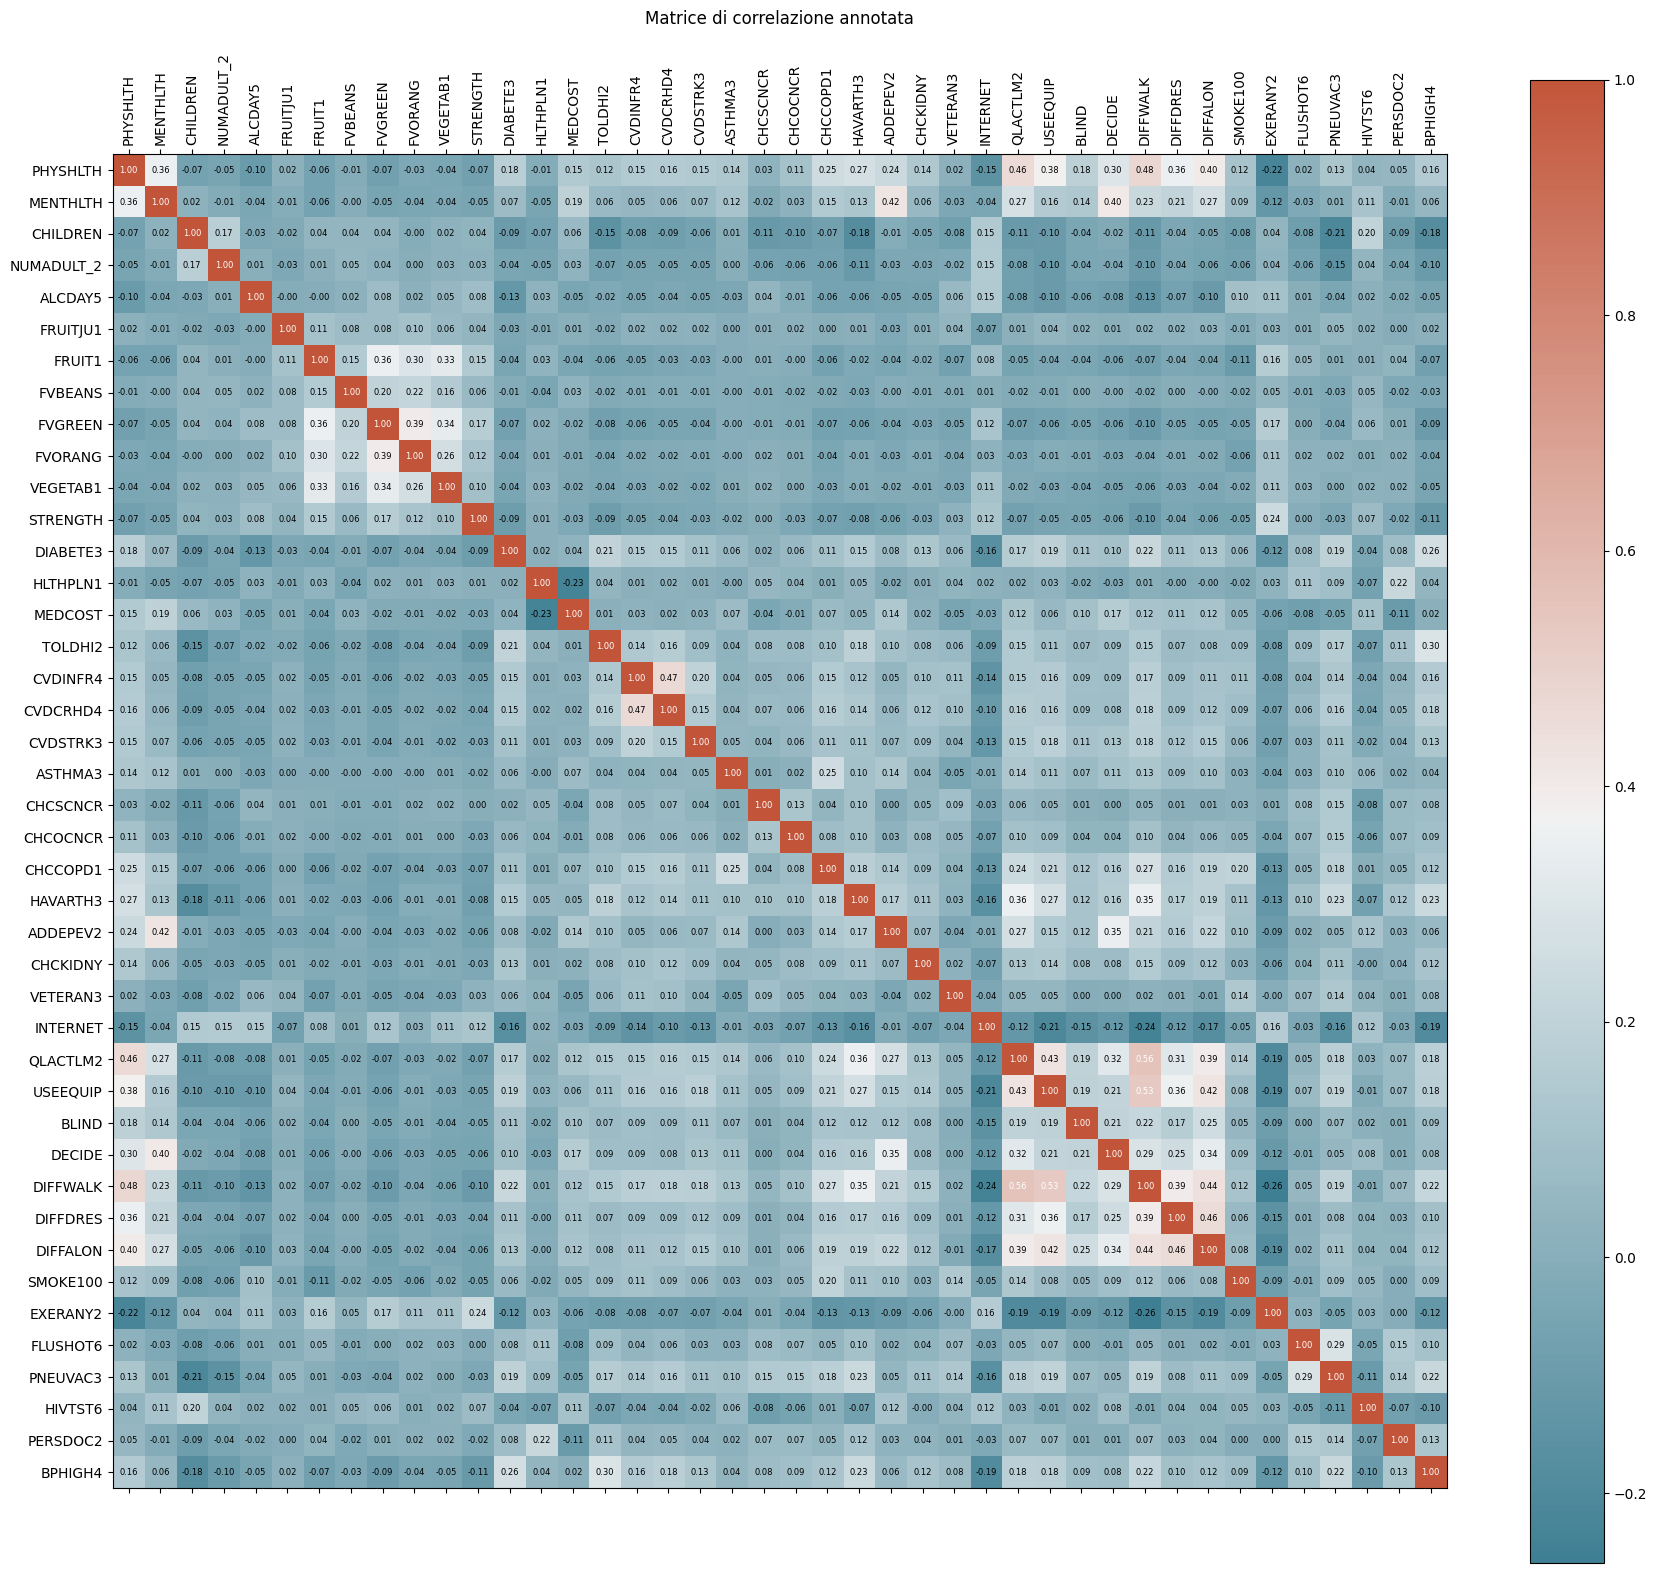

In [68]:
titi = numeric_cols + ['DIABETE3'] + binary_cols
corr = df[titi].corr()
cmap = sns.diverging_palette(220, 20, as_cmap=True)

# 3) Disegna la heatmap
fig, ax = plt.subplots(figsize=(18, 16))
cax = ax.matshow(corr, cmap=cmap)
fig.colorbar(cax)

# 4) Tick e label
ticks = np.arange(len(titi))
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(titi, rotation=90)
ax.set_yticklabels(titi)

# 5) Annotazioni
for i in ticks:
    for j in ticks:
        ax.text(j, i, f"{corr.iloc[i, j]:.2f}",
                ha='center', va='center', fontsize=6,
                color='white' if abs(corr.iloc[i, j]) > 0.5 else 'black')

plt.title('Matrice di correlazione annotata', pad=20)
plt.tight_layout()
plt.show()

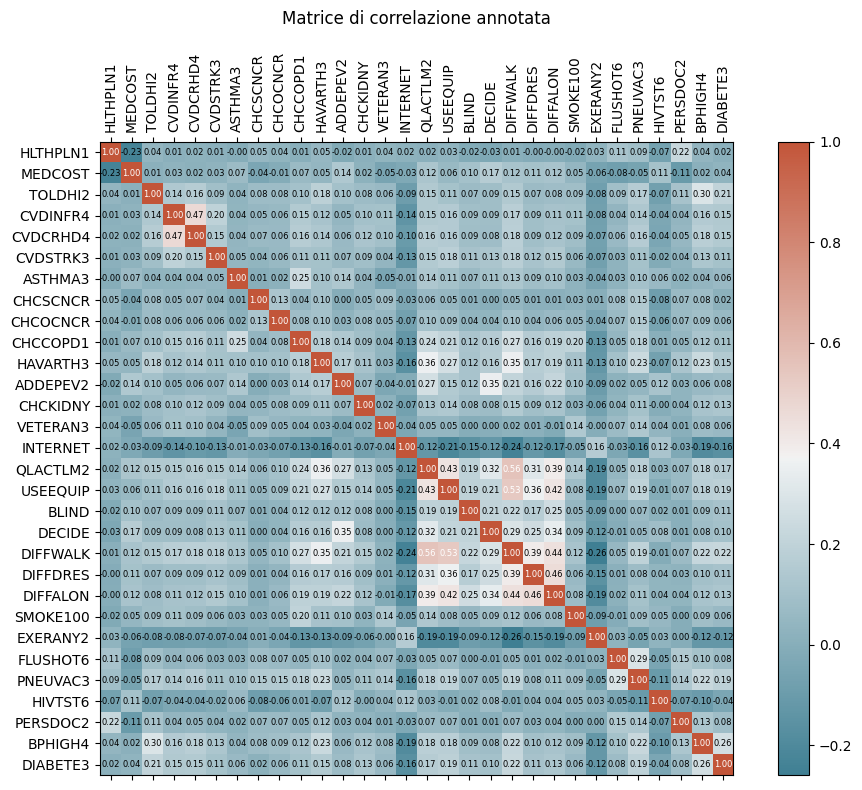

In [69]:
prv = binary_cols + ['DIABETE3']
corr = df[prv].corr()
cmap = sns.diverging_palette(220, 20, as_cmap=True)

# 3) Disegna la heatmap
fig, ax = plt.subplots(figsize=(10, 8))
cax = ax.matshow(corr, cmap=cmap)
fig.colorbar(cax)

# 4) Tick e label
ticks = np.arange(len(prv))
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(prv, rotation=90)
ax.set_yticklabels(prv)

# 5) Annotazioni
for i in ticks:
    for j in ticks:
        ax.text(j, i, f"{corr.iloc[i, j]:.2f}",
                ha='center', va='center', fontsize=6,
                color='white' if abs(corr.iloc[i, j]) > 0.5 else 'black')

plt.title('Matrice di correlazione annotata', pad=20)
plt.tight_layout()
plt.show()

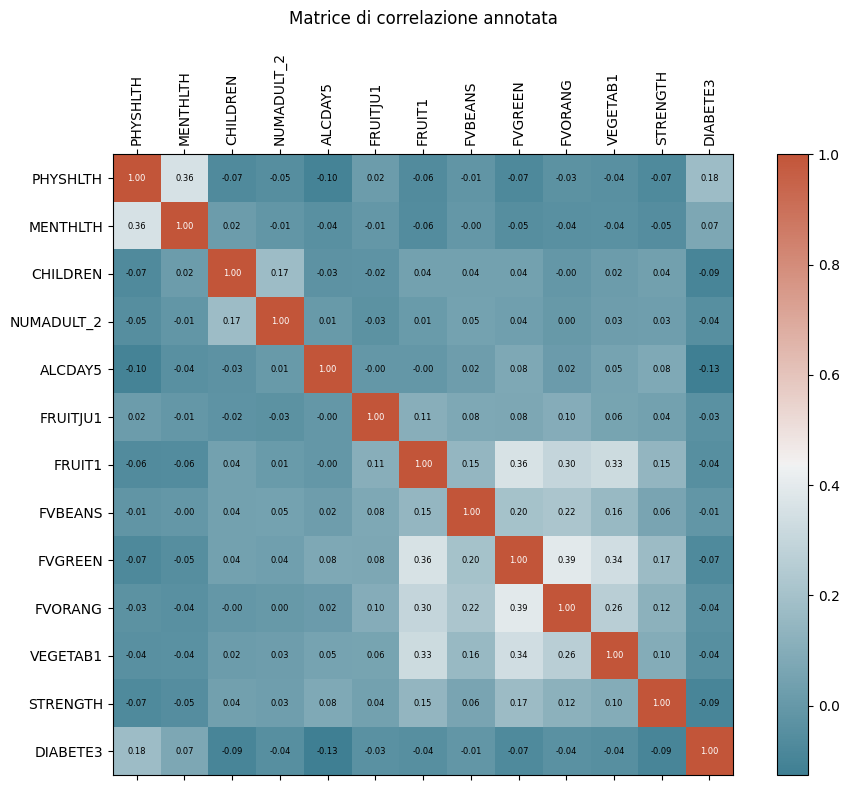

In [ ]:
#  correlazione
titi = numeric_cols + ['DIABETE3']
corr = df[titi].corr()
cmap = sns.diverging_palette(220, 20, as_cmap=True)

# heatmap
fig, ax = plt.subplots(figsize=(10, 8))
cax = ax.matshow(corr, cmap=cmap)
fig.colorbar(cax)

ticks = np.arange(len(titi))
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(titi, rotation=90)
ax.set_yticklabels(titi)


for i in ticks:
    for j in ticks:
        ax.text(j, i, f"{corr.iloc[i, j]:.2f}",
                ha='center', va='center', fontsize=6,
                color='white' if abs(corr.iloc[i, j]) > 0.5 else 'black')

plt.title('Matrice di correlazione annotata', pad=20)
plt.tight_layout()
plt.show()

Guardando questa matrice di correlazione salta all'occhio come le variabili dedicate al consumo di cibo sano siano correlate tra loro e potremmo raggrupparle

In [71]:
#controllo quanta varianza spiega la prima componente principale della pca effettuata sul gruppo di variabili correlate riguardanti l'alimentazione sana
"""
nutri_cols = ['FRUIT1', 'FVBEANS','FVGREEN',
    'FVORANG','VEGETAB1']
df[nutri_cols] = df[nutri_cols].fillna(df[nutri_cols].mean())
Xs = StandardScaler().fit_transform(df[nutri_cols])
pca = PCA(n_components=1).fit(Xs)
print("Varianza spiegata PC1:", pca.explained_variance_ratio_[0])

"""

#spiega solo il 40% della varianza, quindi non è una buona rappresentazione delle variabili nutrizionali

'\nnutri_cols = [\'FRUIT1\', \'FVBEANS\',\'FVGREEN\',\n    \'FVORANG\',\'VEGETAB1\']\ndf[nutri_cols] = df[nutri_cols].fillna(df[nutri_cols].mean())\nXs = StandardScaler().fit_transform(df[nutri_cols])\npca = PCA(n_components=1).fit(Xs)\nprint("Varianza spiegata PC1:", pca.explained_variance_ratio_[0])\n\n'

In [72]:

# https://pubmed.ncbi.nlm.nih.gov/16321593/
#https://www.cdc.gov/pcd/issues/2014/13_0390.htm?utm_source
# i paper che spiegano il perchè dei pesi
"""""
nutri_cols = ['FRUIT1', 'FVBEANS','FVGREEN',
    'FVORANG','VEGETAB1']

weights = {'FRUIT1':1, 'FVBEANS':1.2, 'FVGREEN':1.5, 'FVORANG':0.5, 'VEGETAB1':1.5}
df['NutritionScore'] = sum(df[c] * w for c,w in weights.items())

df.drop(columns=nutri_cols, inplace=True)
"""

# lo faccio nel preprocessing

'""\nnutri_cols = [\'FRUIT1\', \'FVBEANS\',\'FVGREEN\',\n    \'FVORANG\',\'VEGETAB1\']\n\nweights = {\'FRUIT1\':1, \'FVBEANS\':1.2, \'FVGREEN\':1.5, \'FVORANG\':0.5, \'VEGETAB1\':1.5}\ndf[\'NutritionScore\'] = sum(df[c] * w for c,w in weights.items())\n\ndf.drop(columns=nutri_cols, inplace=True)\n'

In [73]:
df = df.drop(['MENTHLTH', 'NUMADULT_2'], axis=1) #basandomi sulla bassissima correlazione con il target

In [74]:
df.info()

df['_STATE'].unique()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 321457 entries, 0 to 321456
Data columns (total 56 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   _STATE    321457 non-null  object 
 1   GENHLTH   320707 non-null  float64
 2   PHYSHLTH  315181 non-null  float64
 3   HLTHPLN1  320798 non-null  Int64  
 4   PERSDOC2  320512 non-null  Int64  
 5   MEDCOST   320812 non-null  Int64  
 6   CHECKUP1  318370 non-null  float64
 7   BPHIGH4   320806 non-null  Int64  
 8   CHOLCHK   317268 non-null  float64
 9   TOLDHI2   318789 non-null  Int64  
 10  CVDINFR4  320086 non-null  Int64  
 11  CVDCRHD4  318652 non-null  Int64  
 12  CVDSTRK3  320613 non-null  Int64  
 13  ASTHMA3   320590 non-null  Int64  
 14  CHCSCNCR  320631 non-null  Int64  
 15  CHCOCNCR  320822 non-null  Int64  
 16  CHCCOPD1  319944 non-null  Int64  
 17  HAVARTH3  319679 non-null  Int64  
 18  ADDEPEV2  320240 non-null  Int64  
 19  CHCKIDNY  320461 non-null  Int64  
 20  DIAB

array(['1.0', '2.0', '4.0', '5.0', '6.0', '8.0', '9.0', '10.0', '11.0',
       '12.0', '13.0', '15.0', '16.0', '17.0', '18.0', '19.0', '20.0',
       '21.0', '22.0', '23.0', '24.0', '25.0', '26.0', '27.0', '28.0',
       '29.0', '30.0', '31.0', '32.0', '33.0', '34.0', '35.0', '36.0',
       '37.0', '38.0', '39.0', '40.0', '41.0', '42.0', '44.0', '45.0',
       '46.0', '47.0', '48.0', '49.0', '50.0', '51.0', '53.0', '54.0',
       '55.0', '56.0', '66.0', '72.0'], dtype=object)

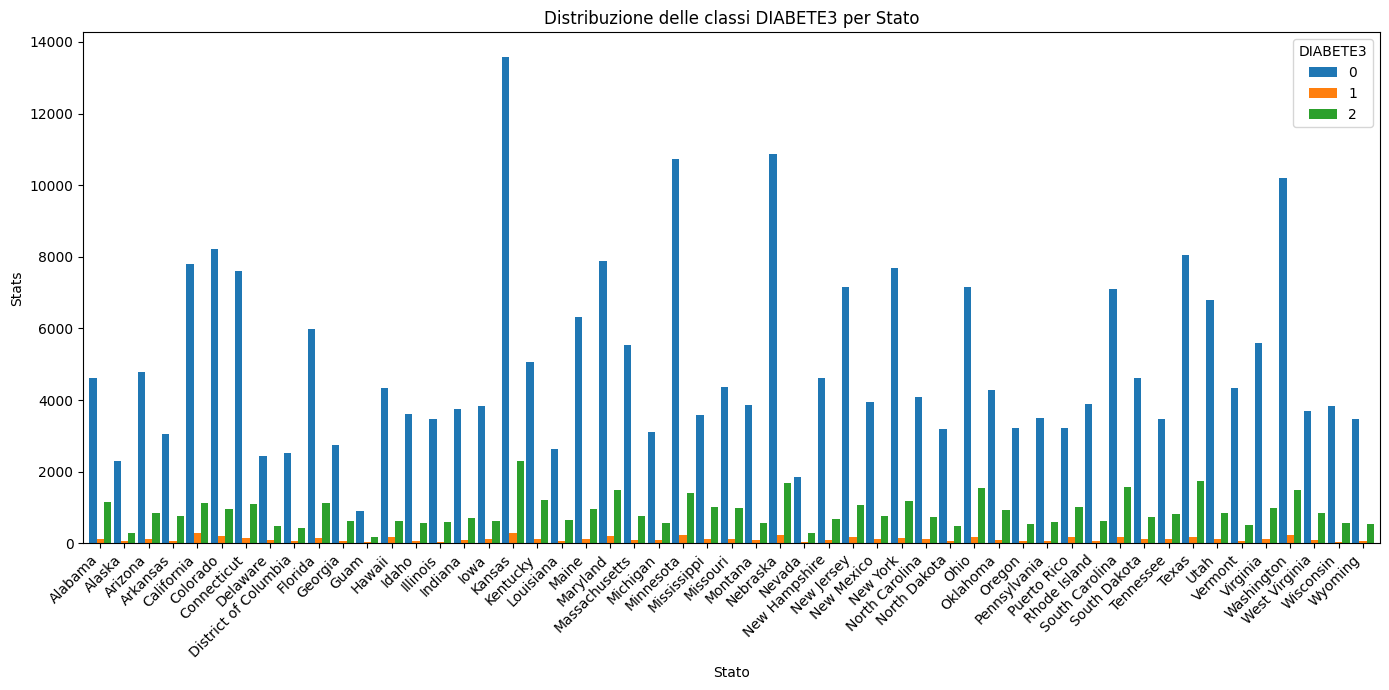

In [ ]:

#questo grafico funziona se _STATE è di tipo category

df_c = df.copy()
df_c['_STATE'] = pd.to_numeric(df_c['_STATE'], errors='coerce')

state_map = {
    1.0: "Alabama", 2.0: "Alaska", 4.0: "Arizona", 5.0: "Arkansas", 6.0: "California",
    8.0: "Colorado", 9.0: "Connecticut", 10.0: "Delaware", 11.0: "District of Columbia",
    12.0: "Florida", 13.0: "Georgia", 15.0: "Hawaii", 16.0: "Idaho", 17.0: "Illinois",
    18.0: "Indiana", 19.0: "Iowa", 20.0: "Kansas", 21.0: "Kentucky", 22.0: "Louisiana",
    23.0: "Maine", 24.0: "Maryland", 25.0: "Massachusetts", 26.0: "Michigan",
    27.0: "Minnesota", 28.0: "Mississippi", 29.0: "Missouri", 30.0: "Montana",
    31.0: "Nebraska", 32.0: "Nevada", 33.0: "New Hampshire", 34.0: "New Jersey",
    35.0: "New Mexico", 36.0: "New York", 37.0: "North Carolina", 38.0: "North Dakota",
    39.0: "Ohio", 40.0: "Oklahoma", 41.0: "Oregon", 42.0: "Pennsylvania",
    44.0: "Rhode Island", 45.0: "South Carolina", 46.0: "South Dakota",
    47.0: "Tennessee", 48.0: "Texas", 49.0: "Utah", 50.0: "Vermont", 51.0: "Virginia",
    53.0: "Washington", 54.0: "West Virginia", 55.0: "Wisconsin", 56.0: "Wyoming",
    66.0: "Guam", 72.0: "Puerto Rico"
}
df_c['_STATE'] = df_c['_STATE'].map(state_map)



counts = df_c.groupby(['_STATE', 'DIABETE3']).size().unstack(fill_value=0)

# Crea il bar chart raggruppato
ax = counts.plot(kind='bar', figsize=(14, 7), width=0.9, stacked=False)
ax.set_xlabel('Stato')
ax.set_ylabel('Stats')
ax.set_title('Distribuzione delle classi DIABETE3 per Stato')
ax.legend(title='DIABETE3', loc='upper right')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 321457 entries, 0 to 321456
Data columns (total 56 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   _STATE    321457 non-null  object 
 1   GENHLTH   320707 non-null  float64
 2   PHYSHLTH  315181 non-null  float64
 3   HLTHPLN1  320798 non-null  Int64  
 4   PERSDOC2  320512 non-null  Int64  
 5   MEDCOST   320812 non-null  Int64  
 6   CHECKUP1  318370 non-null  float64
 7   BPHIGH4   320806 non-null  Int64  
 8   CHOLCHK   317268 non-null  float64
 9   TOLDHI2   318789 non-null  Int64  
 10  CVDINFR4  320086 non-null  Int64  
 11  CVDCRHD4  318652 non-null  Int64  
 12  CVDSTRK3  320613 non-null  Int64  
 13  ASTHMA3   320590 non-null  Int64  
 14  CHCSCNCR  320631 non-null  Int64  
 15  CHCOCNCR  320822 non-null  Int64  
 16  CHCCOPD1  319944 non-null  Int64  
 17  HAVARTH3  319679 non-null  Int64  
 18  ADDEPEV2  320240 non-null  Int64  
 19  CHCKIDNY  320461 non-null  Int64  
 20  DIAB

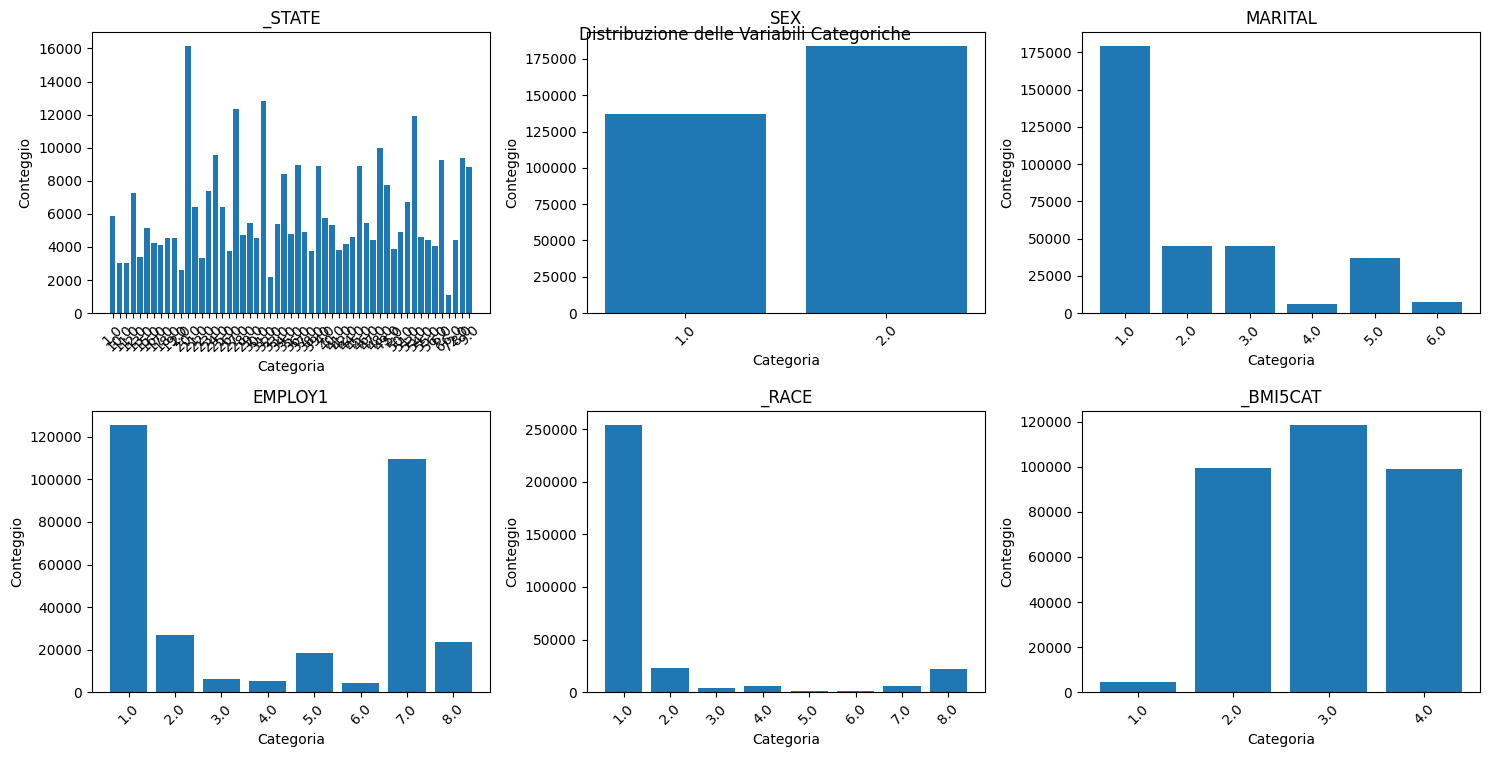

In [ ]:


n = len(nominal_cols)
cols = 3
rows = int(np.ceil(n / cols))

fig, axes = plt.subplots(rows, cols, figsize=(cols*5, rows*4))
axes = axes.flatten()

for ax, col in zip(axes, nominal_cols):
    counts = df[col].value_counts().sort_index()
    ax.bar(counts.index.astype(str), counts.values)
    ax.set_title(col)
    ax.set_xlabel('Categoria')
    ax.set_ylabel('Conteggio')
    ax.tick_params(axis='x', rotation=45)


for ax in axes[n:]:
    ax.axis('off')

fig.suptitle('Distribuzione delle Variabili Categoriche', y=0.92)
plt.tight_layout()
plt.show()


in employ la categoria 3 e 4 si può raggruppare insieme essendo entrambe 'out of work' ma per differenti periodi di tempo.

In [78]:
df['EMPLOY1'].unique()

array(['8.0', '3.0', '2.0', '7.0', '5.0', nan, '1.0', '4.0', '6.0'],
      dtype=object)

In [79]:

df['EMPLOY1'] = df['EMPLOY1'].replace({'4.0': '3.0', '6.0':'3.0'})
df['_RACE'] = df['_RACE'].replace({'4.0': '3.0', '5.0': '3.0', '6.0': '3.0', '7.0': '3.0'})
df['MARITAL'] = df['MARITAL'].replace({'6.0': '4.0'})


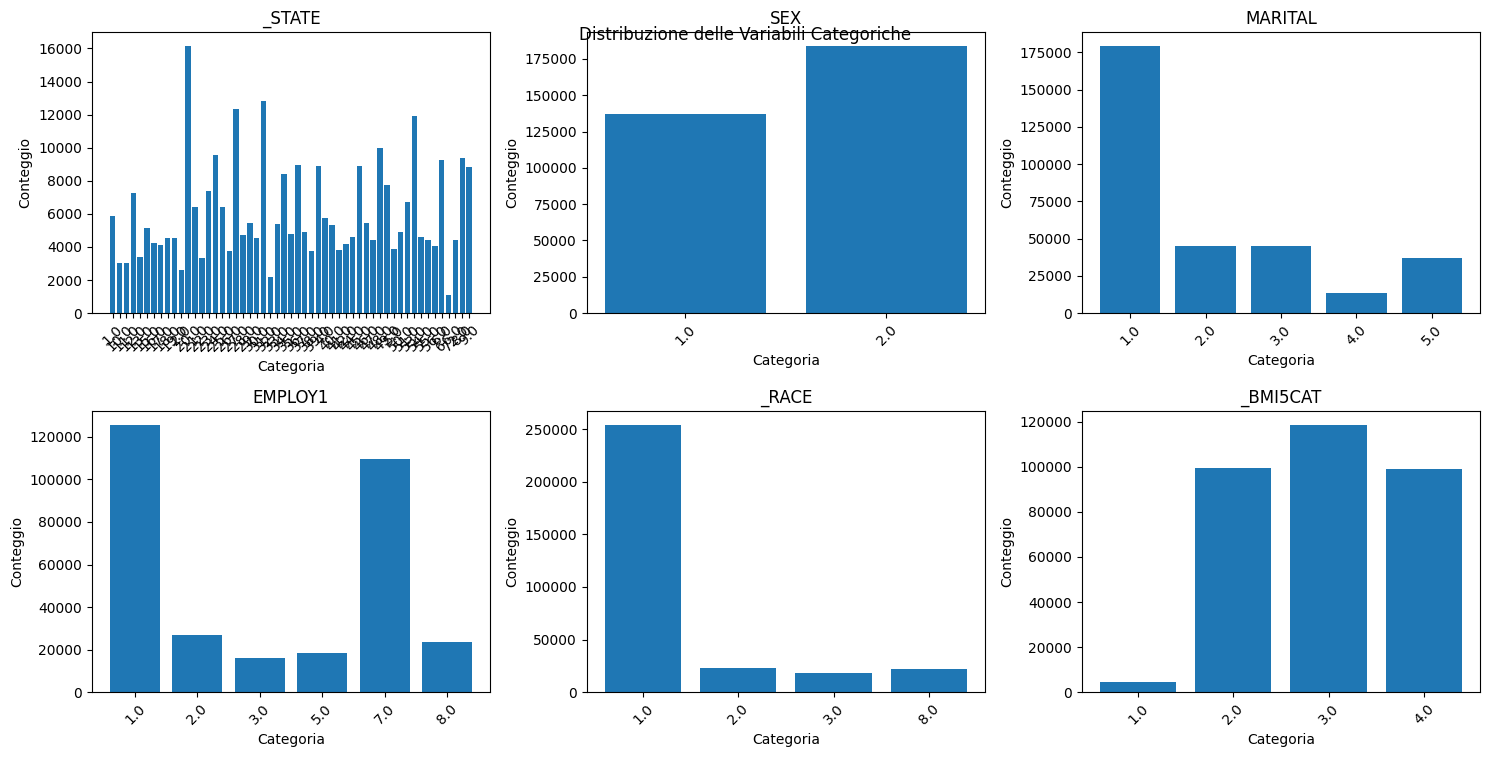

In [ ]:
n = len(nominal_cols)
cols = 3
rows = int(np.ceil(n / cols))

fig, axes = plt.subplots(rows, cols, figsize=(cols*5, rows*4))
axes = axes.flatten()

for ax, col in zip(axes, nominal_cols):
    counts = df[col].value_counts().sort_index()
    ax.bar(counts.index.astype(str), counts.values)
    ax.set_title(col)
    ax.set_xlabel('Categoria')
    ax.set_ylabel('Conteggio')
    ax.tick_params(axis='x', rotation=45)


for ax in axes[n:]:
    ax.axis('off')

fig.suptitle('Distribuzione delle Variabili Categoriche', y=0.92)
plt.tight_layout()
plt.show()

Effettuo il chi square test per verificare che tutte le variabili categoriche siano necessarie o meno.

In [81]:

state_map = {
    "1.0": "Alabama", "2.0": "Alaska", "4.0": "Arizona", "5.0": "Arkansas", "6.0": "California",
    "8.0": "Colorado", "9.0": "Connecticut", "10.0": "Delaware", "11.0": "District of Columbia",
    "12.0": "Florida", "13.0": "Georgia", "15.0": "Hawaii", "16.0": "Idaho", "17.0": "Illinois",
    "18.0": "Indiana", "19.0": "Iowa", "20.0": "Kansas", "21.0": "Kentucky", "22.0": "Louisiana",
    "23.0": "Maine", "24.0": "Maryland", "25.0": "Massachusetts", "26.0": "Michigan",
    "27.0": "Minnesota", "28.0": "Mississippi", "29.0": "Missouri", "30.0": "Montana",
    "31.0": "Nebraska", "32.0": "Nevada", "33.0": "New Hampshire", "34.0": "New Jersey",
    "35.0": "New Mexico", "36.0": "New York", "37.0": "North Carolina", "38.0": "North Dakota",
    "39.0": "Ohio", "40.0": "Oklahoma", "41.0": "Oregon", "42.0": "Pennsylvania",
    "44.0": "Rhode Island", "45.0": "South Carolina", "46.0": "South Dakota",
    "47.0": "Tennessee", "48.0": "Texas", "49.0": "Utah", "50.0": "Vermont", "51.0": "Virginia",
    "53.0": "Washington", "54.0": "West Virginia", "55.0": "Wisconsin", "56.0": "Wyoming",
    "66.0": "Guam", "72.0": "Puerto Rico"
}


df['_STATE'] = df['_STATE'].map(state_map)

# Mappa stato -> regione
region_map = {
    'Maine':'Northeast','New Hampshire':'Northeast','Vermont':'Northeast',
    'Massachusetts':'Northeast','Rhode Island':'Northeast','Connecticut':'Northeast',
    'New York':'Northeast','New Jersey':'Northeast','Pennsylvania':'Northeast',
    'Ohio':'Midwest','Michigan':'Midwest','Indiana':'Midwest','Wisconsin':'Midwest',
    'Illinois':'Midwest','Minnesota':'Midwest','Iowa':'Midwest','Missouri':'Midwest',
    'North Dakota':'Midwest','South Dakota':'Midwest','Nebraska':'Midwest','Kansas':'Midwest',
    'Delaware':'South','Maryland':'South','District of Columbia':'South','Virginia':'South',
    'West Virginia':'South','North Carolina':'South','South Carolina':'South','Georgia':'South',
    'Florida':'South','Kentucky':'South','Tennessee':'South','Mississippi':'South',
    'Alabama':'South','Oklahoma':'South','Texas':'South','Arkansas':'South','Louisiana':'South',
    'Arizona':'West','Colorado':'West','Idaho':'West','Montana':'West','Nevada':'West',
    'New Mexico':'West','Utah':'West','Wyoming':'West','Alaska':'West','California':'West',
    'Hawaii':'West','Oregon':'West','Washington':'West','Guam':'West','Puerto Rico':'South'
}
df['_STATE'] = df['_STATE'].map(region_map).astype(str)




# Ordinali e nominali
categoricals = list(ordinal) + nominal_cols



results = []

for col in categoricals:
    
    table = pd.crosstab(df[col], df[target])
    if table.shape[0] < 2 or table.shape[1] < 2:
        continue  # niente test se ha meno di 2 righe o colonne
    # Chi-quadrato
    chi2, p, dof, expected = chi2_contingency(table)
    #  Phi o Cramér's V
    n = table.values.sum()
    phi2 = chi2 / n
    r, k = table.shape
    cramers_v = np.sqrt(phi2 / (min(r, k) - 1))
    
    results.append({
        'variable': col,
        'levels': table.shape,
        'chi2': chi2,
        'p_value': p,
        'cramers_v': cramers_v
    })

# per Cramér’s V decrescente
res_df = pd.DataFrame(results)
res_df = res_df.sort_values('cramers_v', ascending=False).reset_index(drop=True)

print(res_df[['variable','levels','chi2','p_value','cramers_v']])


    variable  levels          chi2        p_value  cramers_v
0    GENHLTH  (5, 3)  29977.144261   0.000000e+00   0.216185
1   _BMI5CAT  (4, 3)  16162.472862   0.000000e+00   0.158554
2    EMPLOY1  (6, 3)  14548.902395   0.000000e+00   0.150764
3     _AGE_G  (6, 3)  11044.127047   0.000000e+00   0.131066
4    INCOME2  (8, 3)   8808.412616   0.000000e+00   0.126243
5    CHOLCHK  (4, 3)   8614.474376   0.000000e+00   0.116516
6      EDUCA  (6, 3)   6370.552121   0.000000e+00   0.099636
7    _PACAT1  (4, 3)   4923.369536   0.000000e+00   0.089288
8   CHECKUP1  (5, 3)   4201.232226   0.000000e+00   0.081228
9      _RACE  (4, 3)   2657.462550   0.000000e+00   0.064705
10   MARITAL  (5, 3)   2547.654609   0.000000e+00   0.063066
11  _SMOKER3  (4, 3)   1451.570520  1.649110e-310   0.047677
12    _STATE  (4, 3)   1284.724796  2.195015e-274   0.044702
13  SEATBELT  (6, 3)    623.429797  1.676291e-127   0.031210
14       SEX  (2, 3)    274.013739   3.152627e-60   0.029196
15   USENOW3  (3, 3)    

elimino le ultime cinque colonne

In [82]:
df.drop(columns=['SEATBELT', 'SEX', 'USENOW3', '_STATE', '_SMOKER3'], inplace=True)

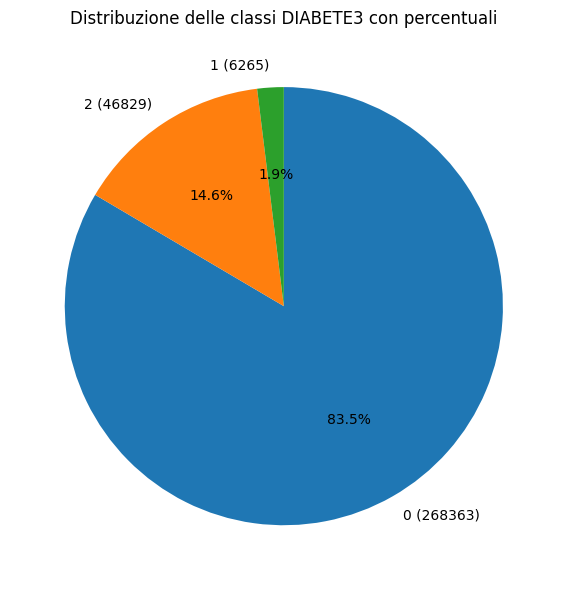

In [83]:
# Conta e calcola percentuali
counts = df['DIABETE3'].value_counts()
percents = counts / counts.sum() * 100

# Grafico a torta
plt.figure(figsize=(6, 6))
plt.pie(percents, labels=[f"{label} ({count})" for label, count in zip(counts.index, counts.values)],
        autopct='%1.1f%%', startangle=90, counterclock=False)
plt.title('Distribuzione delle classi DIABETE3 con percentuali')
plt.tight_layout()
plt.show()

Le classi sono moolto sbilanciate

In [84]:
y_map = {0: 'NoDiabetes',1: 'PreDiabetes', 2:'Diabetes'}
df['DIABETE3'] = df['DIABETE3'].map(y_map).astype(str)

In [85]:
df.to_csv('data.csv', index=False)

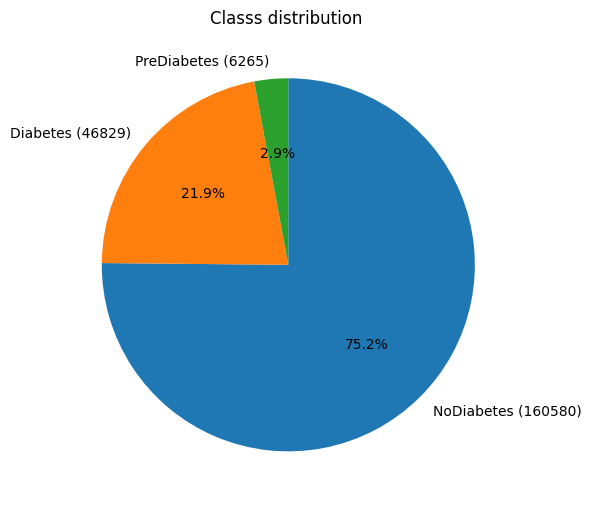

In [90]:
# Droppa le righe dove DIABETE3 == 'NoDiabetes' e almeno un valore è NaN
df_filtered = df[~((df['DIABETE3'] == 'NoDiabetes') & (df.isna().any(axis=1)))]
counts = df_filtered['DIABETE3'].value_counts()
percents = counts / counts.sum() * 100
# Grafico a torta
plt.figure(figsize=(6, 6))
plt.pie(percents, labels=[f"{label} ({count})" for label, count in zip(counts.index, counts.values)],
        autopct='%1.1f%%', startangle=90, counterclock=False)
plt.title('Classs distribution ')
plt.tight_layout()
plt.show()


In [87]:
df_filtered.to_csv('data.csv', index=False)

df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Index: 213674 entries, 0 to 321456
Data columns (total 51 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   GENHLTH   213480 non-null  float64
 1   PHYSHLTH  211979 non-null  float64
 2   HLTHPLN1  213570 non-null  Int64  
 3   PERSDOC2  213524 non-null  Int64  
 4   MEDCOST   213507 non-null  Int64  
 5   CHECKUP1  213063 non-null  float64
 6   BPHIGH4   213531 non-null  Int64  
 7   CHOLCHK   213049 non-null  float64
 8   TOLDHI2   213129 non-null  Int64  
 9   CVDINFR4  213232 non-null  Int64  
 10  CVDCRHD4  212736 non-null  Int64  
 11  CVDSTRK3  213424 non-null  Int64  
 12  ASTHMA3   213485 non-null  Int64  
 13  CHCSCNCR  213515 non-null  Int64  
 14  CHCOCNCR  213529 non-null  Int64  
 15  CHCCOPD1  213236 non-null  Int64  
 16  HAVARTH3  213336 non-null  Int64  
 17  ADDEPEV2  213428 non-null  Int64  
 18  CHCKIDNY  213294 non-null  Int64  
 19  DIABETE3  213674 non-null  object 
 20  MARITAL  

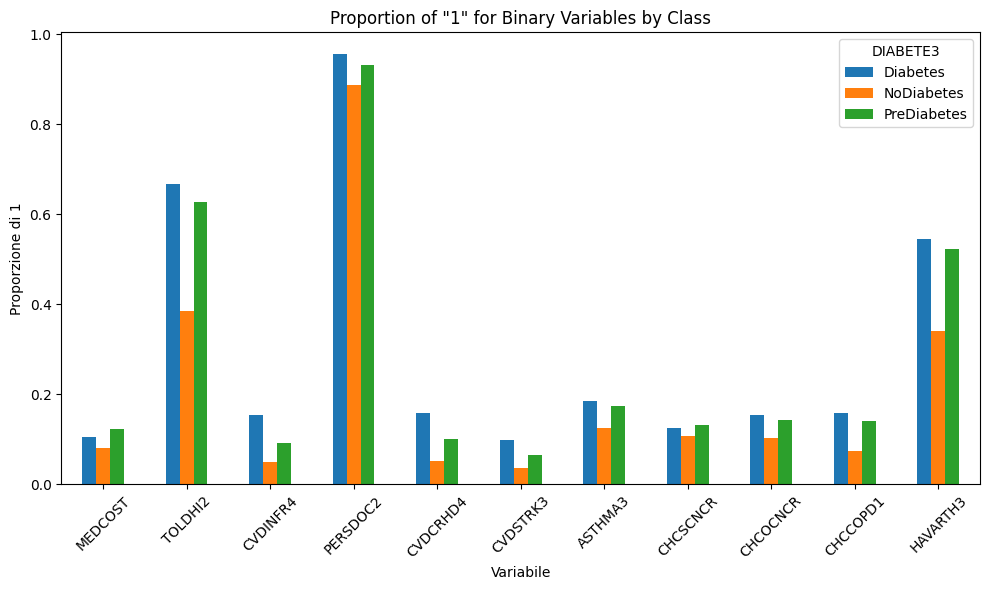

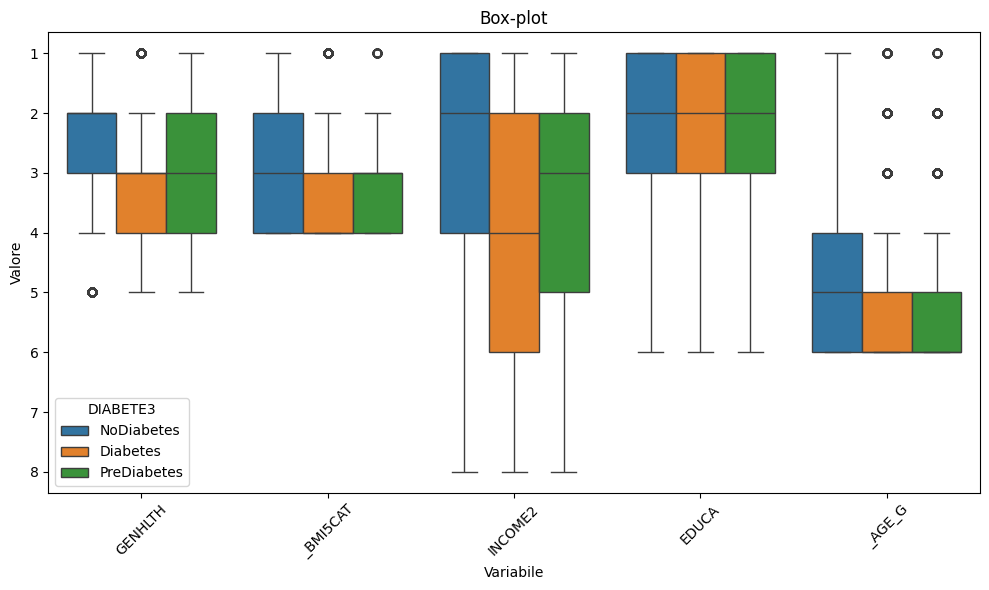

In [ ]:
features = ['GENHLTH','_BMI5CAT',
            'INCOME2', 'EDUCA',
            '_AGE_G']  
class_col = 'DIABETE3'                  


binary_vars = ['MEDCOST','TOLDHI2', 'CVDINFR4', 'PERSDOC2', 
            'CVDCRHD4','CVDSTRK3','ASTHMA3','CHCSCNCR','CHCOCNCR',
            'CHCCOPD1','HAVARTH3']

# calcola la percentuale di “1” per classe
prop = df.groupby(class_col)[binary_vars].mean().T

# plot
fig, ax = plt.subplots(figsize=(10,6))
prop.plot.bar(ax=ax)
ax.set_ylabel('Proporzione di 1')
ax.set_xlabel('Variabile')
ax.set_title('Proportion of "1" for Binary Variables by Class')
plt.xticks(rotation=45)
plt.legend(title=class_col)
plt.tight_layout()
plt.show()

df[class_col] = df[class_col].astype(str)


df_melt = df.melt(
    id_vars=class_col,
    value_vars=features,
    var_name='Variabile',
    value_name='Valore'
)

# --- BOX‐PLOT ---
plt.figure(figsize=(10, 6))
sns.boxplot(
    data=df_melt,
    x='Variabile',
    y='Valore',
    hue=class_col
)
plt.title('Box‐plot')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()